In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
data.drop(columns='time', inplace=True)

print(data.shape)
data.head()

(299, 12)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [56]:
data.duplicated().sum()

0

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [6]:
data['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [7]:
data = data.sample(frac=1).reset_index(drop=True)

y = data['DEATH_EVENT']
X = data.drop(columns='DEATH_EVENT')

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

X.shape, X_train.shape, X_test.shape

((299, 11), (200, 11), (99, 11))

In [38]:
y_train.value_counts(), y_test.value_counts()

(0    136
 1     64
 Name: DEATH_EVENT, dtype: int64,
 0    67
 1    32
 Name: DEATH_EVENT, dtype: int64)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

features = X.columns
numeric_transformer = Pipeline(steps=[
    ('standard', MinMaxScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
        ])


pre = Pipeline(steps=[('preprocessor', preprocessor)])

label_features=features

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=label_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=label_features)


In [40]:
X_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.054545,1.0,0.043625,0.0,0.750000,0.0,0.256880,0.126984,0.628571,0.0,0.0
1,0.454545,0.0,0.018752,0.0,0.333333,0.0,0.283550,0.047619,0.714286,0.0,0.0
2,0.090909,1.0,0.005600,1.0,0.229167,0.0,0.252031,0.047619,0.628571,1.0,0.0
3,0.690909,0.0,0.026175,0.0,0.750000,0.0,0.552673,0.142857,0.714286,1.0,1.0
4,0.181818,0.0,0.072796,0.0,1.000000,1.0,0.147775,0.047619,0.771429,1.0,1.0


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(random_state=111)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)


In [42]:
xgbc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:22:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ExtraTreesClassifier(random_state=111)

In [43]:
# train done using all 12 columns 
from sklearn.metrics import f1_score

models = ['xgbc','dtc','knc','lrc','rfc','abc','bc','etc']

results1 = [f1_score(xgbc.predict(X_test), y_test), f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]

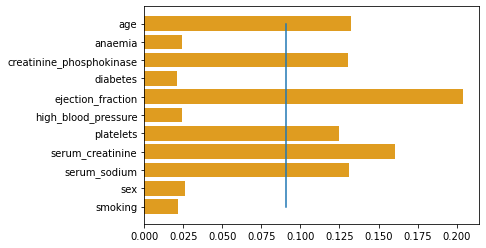

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax=sns.barplot(y=label_features, x=rfc.feature_importances_, color='orange')
ax.plot(np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)), label_features)

In [45]:
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

print(features)
features = features[sel.get_support()]
print(features)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')


C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:23:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


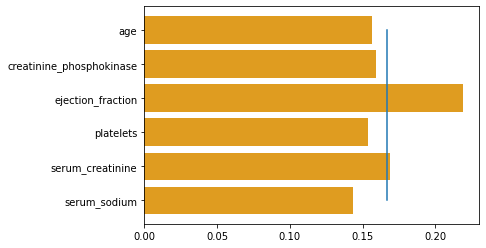

In [46]:
numeric_transformer = Pipeline(steps=[
    ('standard', MinMaxScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
        ])


pre = Pipeline(steps=[('preprocessor', preprocessor)])

label_features=features#+boolean_features

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=label_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=label_features)

xgbc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

results2 = [f1_score(xgbc.predict(X_test), y_test), f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]

fig, ax = plt.subplots()

ax=sns.barplot(y=label_features, x=rfc.feature_importances_, color='orange')
ax.plot(np.mean(rfc.feature_importances_)*np.ones(len(rfc.feature_importances_)), label_features)

In [47]:
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)

print(features)
features = features[sel.get_support()]
print(features)

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')
Index(['ejection_fraction', 'serum_creatinine'], dtype='object')


In [48]:
numeric_transformer = Pipeline(steps=[
    ('standard', MinMaxScaler())
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
        ])


pre = Pipeline(steps=[('preprocessor', preprocessor)])

label_features=features

X_train = pd.DataFrame(pre.fit_transform(X_train), columns=label_features)
X_test = pd.DataFrame(pre.transform(X_test), columns=label_features)

xgbc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

results3 = [f1_score(xgbc.predict(X_test), y_test), f1_score(dtc.predict(X_test), y_test),
    f1_score(knc.predict(X_test), y_test), f1_score(lrc.predict(X_test), y_test),
    f1_score(rfc.predict(X_test), y_test), f1_score(abc.predict(X_test), y_test),
    f1_score(bc.predict(X_test), y_test), f1_score(etc.predict(X_test), y_test)]


C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


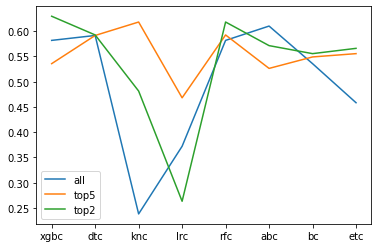

In [58]:
fig, ax = plt.subplots()

ax = sns.lineplot(x=models, y=results1, label='all')
ax = sns.lineplot(x=models, y=results2, label='top5')
ax = sns.lineplot(x=models, y=results3, label='top2')


In [50]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "n_estimators":[100, 150, 200],
      "criterion":['gini', 'entropy'],
      "max_features": ["auto", "sqrt", "log2"],
      "random_state":[111]
      }

In [51]:
grid = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='f1_macro',  # Accuracy
                    return_train_score=True,
                    n_jobs=-1,  # AUC == ROC
                    verbose=10) 

In [52]:
best_model = grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  45 out of  54 | elapsed:    5.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    6.3s finished


In [53]:
print(best_model.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200, 'random_state': 111}


In [76]:
rfc_best = RandomForestClassifier(n_estimators=200,random_state=111)

rfc_best.fit(X_train, y_train)

y_pred = rfc_best.predict(X_test)

print('rfc_best', f1_score(y_pred, y_test, average=None))

print('rfc_best', f1_score(y_pred, y_test, average='micro'))

print('rfc_best', f1_score(y_pred, y_test, average='macro'))
print('rfc_best', f1_score(y_pred, y_test, average='weighted'))

print('rfc_best', f1_score(y_pred, y_test))

rfc_best 0.7878787878787878
rfc_best [0.85314685 0.61818182]
rfc_best 0.7356643356643358
rfc_best 0.798559016740835
rfc_best 0.6181818181818182


In [12]:
tp = 61
tn = 17
fp = 15
fn = 6

r_a = tp/(tp+fn)
p_a = tp/(tp+fp)
f1_a = (2*r_a*p_a)/(r_a+p_a)

r_b = tn/(tn+fp)
p_b = tn/(tn+fn)
f1_b = (2*r_b*p_b)/(r_b+p_b)

print('none: ', (tp+tn)/(tp+tn+fp+fn))
print('micro: ', [f1_a, f1_b])
print('macro: ', (f1_a+f1_b)/2)
print('weighted: ', f1_b)

none:  0.7878787878787878
micro:  [0.8531468531468532, 0.6181818181818182]
macro:  0.7356643356643358
weighted:  0.6181818181818182


In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[61,  6],
       [15, 17]], dtype=int64)

In [78]:
tp=280
tn=0
fp=20
fn=0

my_y_true = np.ones(280) + 


mcc=(tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
acc = (tp+tn)/(tp+tn+fp+fn)
print(2*tp/(2*tp+fp+fn))
print(2*tn/(2*tn+fp+fn))

0.9655172413793104
0.0


C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [100]:
my_y_true = np.append(np.ones(280), np.zeros(20))
my_y_pred = np.ones(300)


print(f1_score(my_y_true, my_y_pred, average='micro'))
print('>>',2*tp/(2*tp+2*fp+2*fn))
print(2*tn/(2*tn+fp+fn))


0.9333333333333333/0.9655172413793104

0.9333333333333333
>> 0.9333333333333333
0.0


0.9666666666666667